In [1]:
import numpy as np

# Sum of Squares for Error (SSE)

In [2]:
def sum_squares_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squares_error(np.array(y1), np.array(t)))
print(sum_squares_error(np.array(y2), np.array(t)))

0.09750000000000003
0.5975


# Cross Entropy Error (CEE)

In [3]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y1), np.array(t)))
print(cross_entropy_error(np.array(y2), np.array(t)))

0.510825457099338
2.302584092994546


# Mini-Batch Training

In [4]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [5]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
print(batch_mask)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

[12598 38877 36469 17527 18768 27667 34737 20160 54643 47306]


In [6]:
def cross_entropy_error(y, t):  # for one-hot vector
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [7]:
def cross_entropy_error(y, t):  # for label vector
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [8]:
def cross_entropy_error(y, t):  # for both one-hot and label vectors
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    # for one-hot vector
    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

# Numerical Differentiation

In [9]:
def function_1(x):
    return 0.01 * x**2 + 0.1 * x

In [10]:
def numerical_diff_rounding_error(f, x):
    h = 1e-50
    return (f(x+h) - f(x)) / h

print(np.float32(1e-50))
print(numerical_diff_rounding_error(function_1, 5), numerical_diff_rounding_error(function_1, 10))

0.0
0.0 0.0


In [11]:
def numerical_diff_center(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

print(numerical_diff_center(function_1, 5), numerical_diff_center(function_1, 10))

0.1999999999990898 0.2999999999986347


# Gradient

In [12]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [13]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]

        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val

    return grad

In [14]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])), numerical_gradient(function_2, np.array([0.0, 2.0])), numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.] [0. 4.] [6. 0.]


# Gradient Descent

In [15]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x


init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100))
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100))
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100))

[-6.11110793e-10  8.14814391e-10]
[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


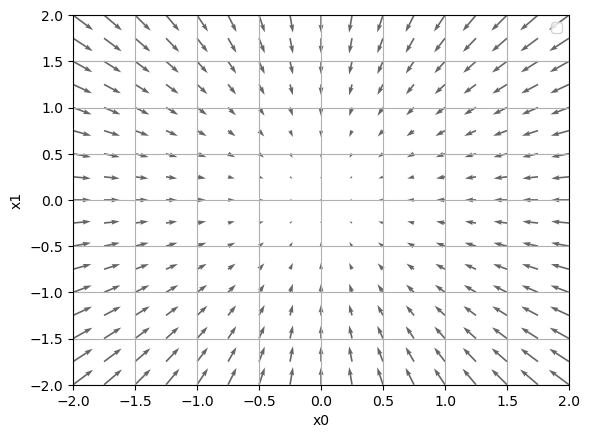

In [16]:
# coding: utf-8
# cf.hppt://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]

        x[idx] = float(tmp_val) + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val

    return grad

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad

def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d * x
    return lambda t: d * t + y


if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)

    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]))

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

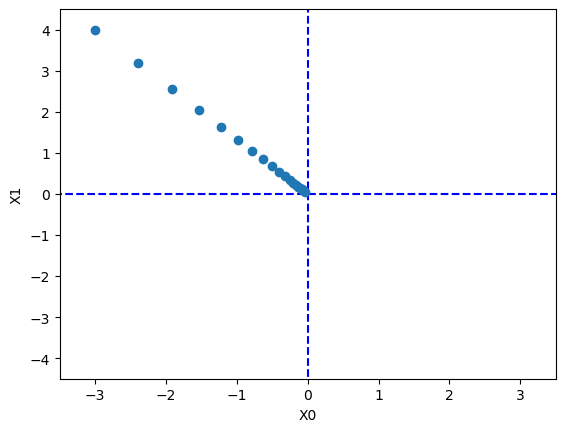

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

def function_2(x):
    return x[0]**2 + x[1]**2


init_x = np.array([-3.0, 4.0])

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [18]:
import sys, os
sys.path.append(os.pardir)
import numpy as np


def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss


net = simpleNet()
print(net.W)

x = np.array([0.6, 0.9])
p = net.predict(x)
t = np.array([0, 0, 1])
print(net.loss(x, t))

[[-0.27261846  1.7878457   0.72018132]
 [-0.93360239  0.39650157  0.16323193]]
1.2659062862631139


In [19]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
dW

array([[ 0.03475043,  0.39605931, -0.43080973],
       [ 0.05212564,  0.59408896, -0.6462146 ]])

# Training Algorithm

In [20]:
import sys, os
sys.path.append(os.pardir)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

def cross_entropy_error(y, t):
    if y.ndim ==1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])

        return accuracy

    def numerical_gradient_update(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}

        batch_num = x.shape[0]

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)

        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [21]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape, net.params['b1'].shape, net.params['W2'].shape, net.params['b2'].shape

((784, 100), (100,), (100, 10), (10,))

train_acc, test_acc | 0.09035, 0.0892
train_acc, test_acc | 0.7842, 0.7895
train_acc, test_acc | 0.8799333333333333, 0.8836
train_acc, test_acc | 0.8987, 0.9021
train_acc, test_acc | 0.9085333333333333, 0.9109
train_acc, test_acc | 0.9155833333333333, 0.9177
train_acc, test_acc | 0.9198333333333333, 0.9215
train_acc, test_acc | 0.9242166666666667, 0.9276
train_acc, test_acc | 0.9273166666666667, 0.9289
train_acc, test_acc | 0.93055, 0.9328
train_acc, test_acc | 0.9332, 0.9341
train_acc, test_acc | 0.93525, 0.9363
train_acc, test_acc | 0.9391833333333334, 0.9385
train_acc, test_acc | 0.9405833333333333, 0.9415
train_acc, test_acc | 0.9425, 0.9423
train_acc, test_acc | 0.9445333333333333, 0.9434
train_acc, test_acc | 0.94605, 0.9455


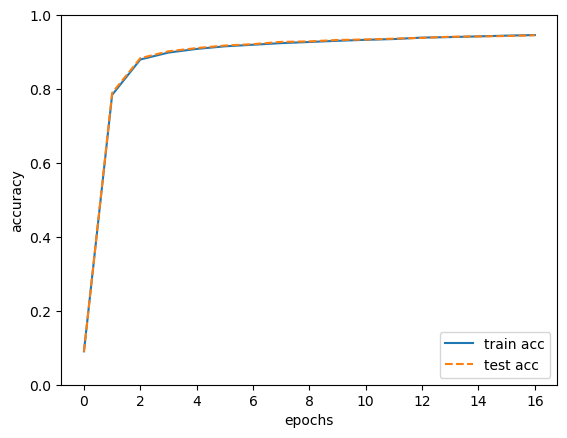

In [25]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train_acc, test_acc | " + str(train_acc) + ", " + str(test_acc))


markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()